In [1]:
import cv2
import pandas as pd
import glob
import numpy as np

In [2]:
path = "input/FER"

faceFiles = [
    *glob.glob(f"../{path}/train/**/*.jpg")
]
faceFiles

['../input/FER/train/happy/Training_50449107.jpg',
 '../input/FER/train/happy/Training_70433018.jpg',
 '../input/FER/train/happy/Training_85610005.jpg',
 '../input/FER/train/happy/Training_4460748.jpg',
 '../input/FER/train/happy/Training_6312930.jpg',
 '../input/FER/train/happy/Training_25740534.jpg',
 '../input/FER/train/happy/Training_80076077.jpg',
 '../input/FER/train/happy/Training_431681.jpg',
 '../input/FER/train/happy/Training_76432922.jpg',
 '../input/FER/train/happy/Training_53152280.jpg',
 '../input/FER/train/happy/Training_82526594.jpg',
 '../input/FER/train/happy/Training_77219425.jpg',
 '../input/FER/train/happy/Training_39023213.jpg',
 '../input/FER/train/happy/Training_77132618.jpg',
 '../input/FER/train/happy/Training_48076410.jpg',
 '../input/FER/train/happy/Training_50296064.jpg',
 '../input/FER/train/happy/Training_72681057.jpg',
 '../input/FER/train/happy/Training_54604212.jpg',
 '../input/FER/train/happy/Training_76820039.jpg',
 '../input/FER/train/happy/Training

In [3]:
print(len(faceFiles))

28709


In [4]:
pics = dict()
for foto in faceFiles:
    label = foto.split("/")[-2]
    pic = foto
    if label in pics:
        pics[label].append(pic)
    else:
        pics[label] = [pic]

In [5]:
im = []
for k,v in pics.items():
    for a in v:
        im.append([k,a])
faces_df =  pd.DataFrame(im, columns=["mood","photo"])
display(faces_df)

,mood,photo
0,happy,../input/FER/train/happy/Training_50449107.jpg
1,happy,../input/FER/train/happy/Training_70433018.jpg
2,happy,../input/FER/train/happy/Training_85610005.jpg
3,happy,../input/FER/train/happy/Training_4460748.jpg
4,happy,../input/FER/train/happy/Training_6312930.jpg
...,...,...
28704,disgust,../input/FER/train/disgust/Training_94788538.jpg
28705,disgust,../input/FER/train/disgust/Training_81049148.jpg
28706,disgust,../input/FER/train/disgust/Training_28365203.jpg
28707,disgust,../input/FER/train/disgust/Training_39197750.jpg


In [6]:
import random
who = random.choice(faces_df.mood)
missing = pics[who]

In [7]:
faces_df.mood.value_counts()

happy       7215
neutral     4965
sad         4830
fear        4097
angry       3995
surprise    3171
disgust      436
Name: mood, dtype: int64

[(2, 2, 43, 44)]


array([[ 43,  42,  40, ...,  32,  31,  23],
       [ 39,  39,  31, ...,  52,  39,  20],
       [ 42,  34,  15, ...,  65,  47,  30],
       ...,
       [ 62,  66,  67, ..., 142, 184, 186],
       [ 59,  65,  66, ..., 176, 194, 197],
       [ 65,  67,  68, ..., 192, 196, 200]], dtype=uint8)

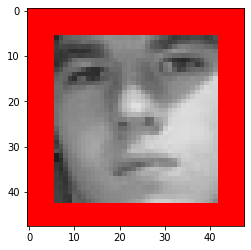

In [8]:
import matplotlib.pyplot as plt
import cv2
import face_recognition

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

def extractFace(picFile, method="recognition", debug=False):
    im = cv2.imread(picFile)    
    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    plt.imshow(im_bw, cmap="gray")
    # Face detection, OJO: esto detecta multiples caras
    if method == "recognition":
        faces = face_recognition.face_locations(im_bw)
        faces = [(l,t,r-l,b-t) for t,r,b,l in faces]
    else:
        faces = face_cascade.detectMultiScale(im_bw, 2, 4)

    if len(faces) == 0:
        print(f"Warning: no face detected on {picFile}")
        return 
    
    if debug:
        print(faces)
    selected_face = faces[0]
    discard_faces = faces[1:]
    
    if debug:
        debug_squares = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        # plot the invalid squares in blue
        for face in discard_faces:
            x,y,w,h = face
            debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(0, 0, 255) ,5)
        # plot the selected face in red
        x,y,w,h = selected_face
        debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(255, 0, 0) ,5)

        plt.imshow(debug_squares)

            
    # extract selected face as B&W 
    x,y,w,h = selected_face
    cara = im_bw[y:y+h,x:x+h]    
    return cara

    
    
    
extractFace(missing[1], debug=True)

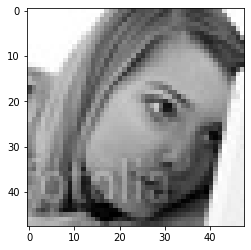

In [14]:
missingFaces = [extractFace(missingPic) for missingPic in missing]


In [16]:
missingFaces = [a for a in missingFaces if isinstance(a, np.ndarray)]

In [17]:
dim = (100,100)
missingNormalized = [cv2.resize(a, dim, interpolation=cv2.INTER_AREA) for a in missingFaces]

In [18]:
[a.shape for a in missingNormalized]

[(100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),

In [23]:
# Wrap all in one fn
def processFiles(files, dim=(100,100)):
    output_faces = []
    for incomingFile in files: 
        face = extractFace(incomingFile)
        if  isinstance(face, np.ndarray):
            face = cv2.resize(face, dim, interpolation=cv2.INTER_AREA)
            output_faces.append(face)
    return output_faces


array([-0.10178679,  0.04321613, -0.02583014, -0.03178973, -0.17430861,
       -0.01958563, -0.00530072, -0.13657549,  0.12462937, -0.0816046 ,
        0.30561745, -0.04618807, -0.28083038, -0.07702688, -0.06603883,
        0.08676355, -0.10327224, -0.0977262 , -0.10044545, -0.02228731,
       -0.00682793,  0.05957268,  0.00301354,  0.05524308, -0.12198086,
       -0.361426  , -0.03687064, -0.08630995, -0.07994973, -0.06917734,
        0.0358438 ,  0.15409744, -0.21979567, -0.07147504,  0.0454498 ,
        0.09344483, -0.09769048,  0.02030997,  0.21983862,  0.04271891,
       -0.14153138,  0.06770837,  0.02674136,  0.28786874,  0.19518301,
       -0.0383509 ,  0.01472796, -0.10912162,  0.12818593, -0.27824438,
        0.0123944 ,  0.20224848,  0.15893948,  0.05245433,  0.04566353,
       -0.04365222,  0.00697684,  0.0699324 , -0.20157303,  0.05179514,
        0.09454212, -0.08417061, -0.06061461, -0.09872574,  0.16853553,
        0.06253859, -0.09840676, -0.13704269,  0.13080788, -0.18

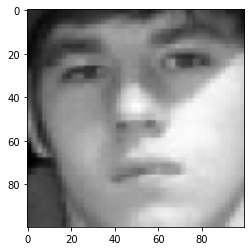

In [26]:
import face_recognition

def extractFeatures(faceIm, useFeats="face",debug=False):
    if debug:
        plt.figure()
        plt.imshow(faceIm, cmap="gray")
    if useFeats == "fft":
        fft2d = np.log(np.abs(np.fft.fft2(faceIm)))
        fft2d = fft2d[0:len(fft2d)//2,0:len(fft2d)//2]
        fft2d = fft2d[5:20,5:20]
        
        if debug:
            plt.figure()
            plt.imshow(fft2d, cmap="gray")
            print(fft2d.shape)
        
        return np.hstack(fft2d)
    elif useFeats == "face":
        imcol = cv2.cvtColor(faceIm, cv2.COLOR_GRAY2RGB)
        feats = face_recognition.face_encodings(imcol)
        if len(feats) > 0:
            return feats[0]
        return None
    
extractFeatures(missingNormalized[0], debug=True)

In [ ]:
featurized_dataset = []
for mood,photo in pics.items():
    faces = processFiles(photo)
    print(f"Processing {mood}....")
    for i,face in enumerate(faces):
        featurized_dataset.append({
            "mood":mood,
            "picName":i,
            "feats":extractFeatures(face)
        })

Processing happy....
